In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/cleaned_training_data.csv", index_col = 0, header =0)
df2 = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/cleaned_test_v3.csv", index_col = 0, header =0)
# lbl = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/cleaned_labels_v3.csv", index_col = 0, header =0)

In [7]:
cols = df1.columns

In [8]:
df1.shape

(39976, 30)

In [9]:
df2.shape

(12000, 48)

In [12]:
label = df1.iloc[:,:1]

In [13]:
feature = df1.iloc[:,1:]

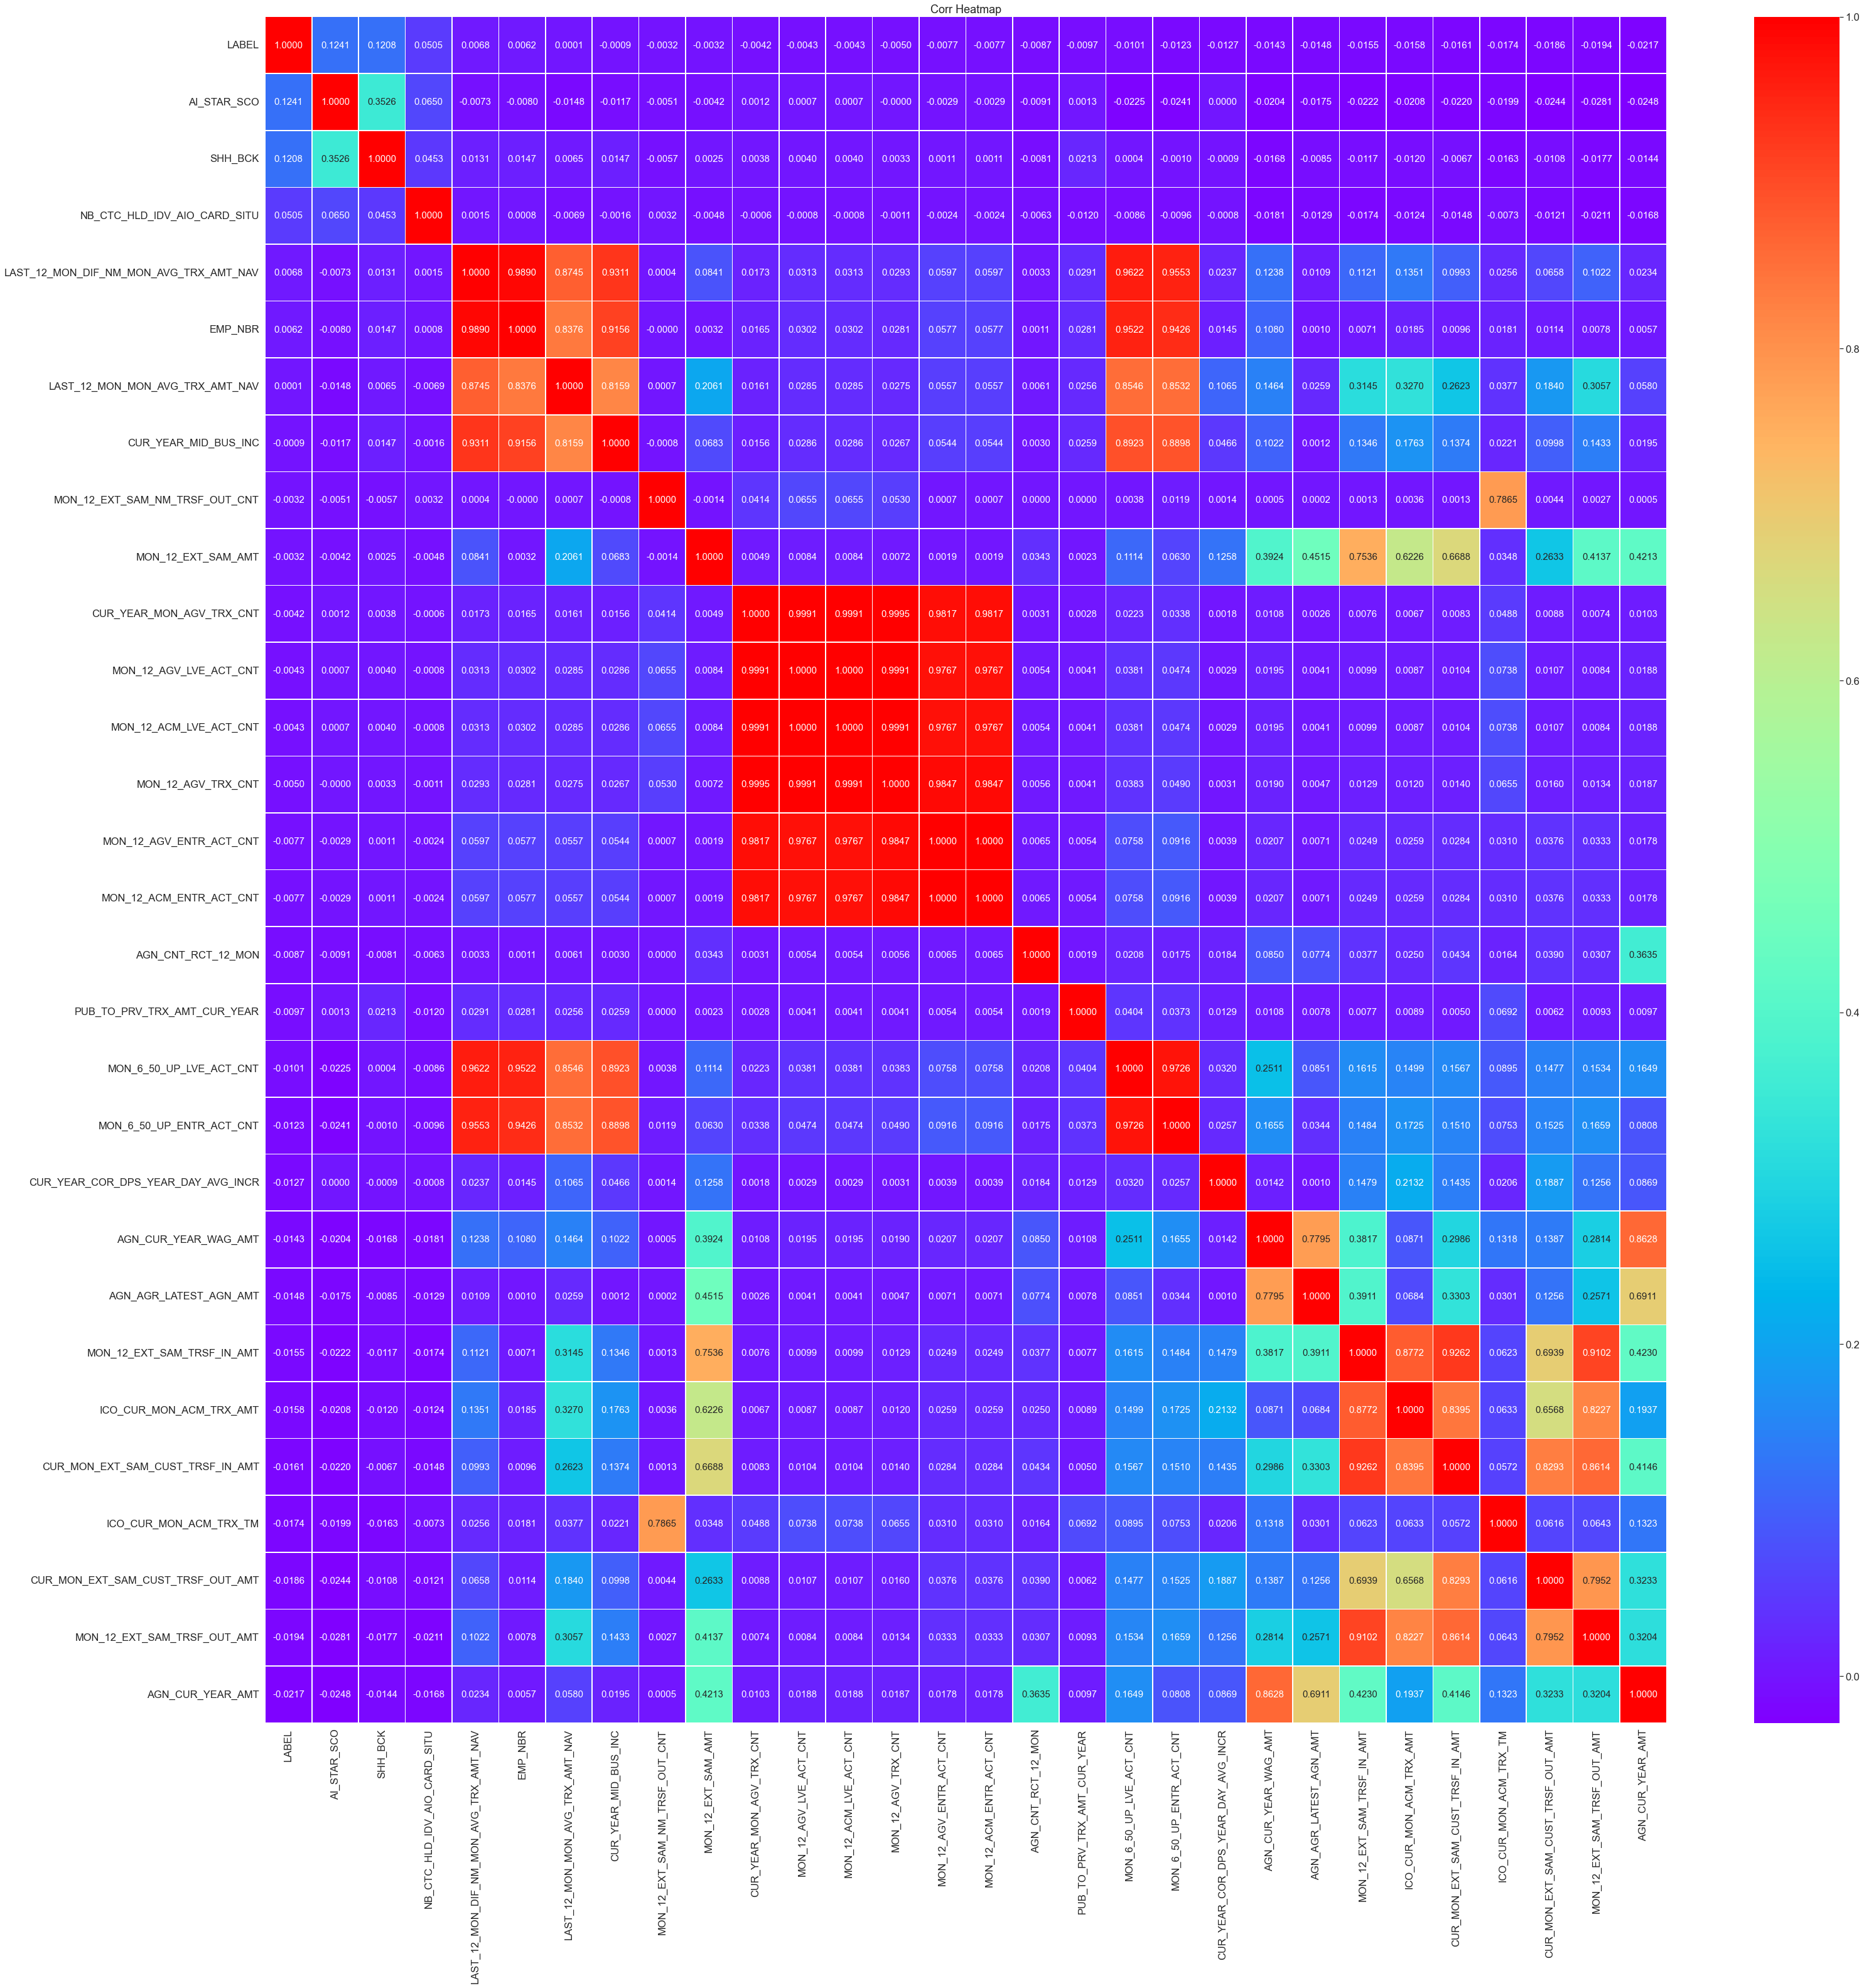

In [16]:
import seaborn as sns
corr = df1.corr()
plt.figure(figsize=(50,50))
sns.set(font_scale=1.5)
ax=sns.heatmap(corr,
               xticklabels=corr.columns,
               yticklabels=corr.columns,
               linewidths=0.6,annot=True,
               cbar=True,cmap="rainbow",fmt='.4f',
               annot_kws={'size': 15})
plt.title("Corr Heatmap")
plt.savefig("Corr Heatmap.png")
plt.show()

In [17]:
cols

Index(['LABEL', 'AI_STAR_SCO', 'SHH_BCK', 'NB_CTC_HLD_IDV_AIO_CARD_SITU',
       'LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV', 'EMP_NBR',
       'LAST_12_MON_MON_AVG_TRX_AMT_NAV', 'CUR_YEAR_MID_BUS_INC',
       'MON_12_EXT_SAM_NM_TRSF_OUT_CNT', 'MON_12_EXT_SAM_AMT',
       'CUR_YEAR_MON_AGV_TRX_CNT', 'MON_12_AGV_LVE_ACT_CNT',
       'MON_12_ACM_LVE_ACT_CNT', 'MON_12_AGV_TRX_CNT',
       'MON_12_AGV_ENTR_ACT_CNT', 'MON_12_ACM_ENTR_ACT_CNT',
       'AGN_CNT_RCT_12_MON', 'PUB_TO_PRV_TRX_AMT_CUR_YEAR',
       'MON_6_50_UP_LVE_ACT_CNT', 'MON_6_50_UP_ENTR_ACT_CNT',
       'CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR', 'AGN_CUR_YEAR_WAG_AMT',
       'AGN_AGR_LATEST_AGN_AMT', 'MON_12_EXT_SAM_TRSF_IN_AMT',
       'ICO_CUR_MON_ACM_TRX_AMT', 'CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT',
       'ICO_CUR_MON_ACM_TRX_TM', 'CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT',
       'MON_12_EXT_SAM_TRSF_OUT_AMT', 'AGN_CUR_YEAR_AMT'],
      dtype='object')

In [41]:
info = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/特征说明.csv", index_col =0, header =1)
quanlitive = [i for i in info.index if info.loc[i,:].values[0] == '字符型' and i in df1.columns and i != 'CUST_UID']

In [42]:
df1[quanlitive] = pd.get_dummies(df1[quanlitive])
df2[quanlitive] = pd.get_dummies(df2[quanlitive])

In [29]:
quantitive = list(cols)
for x in quanlitive:
    quantitive.remove(x)

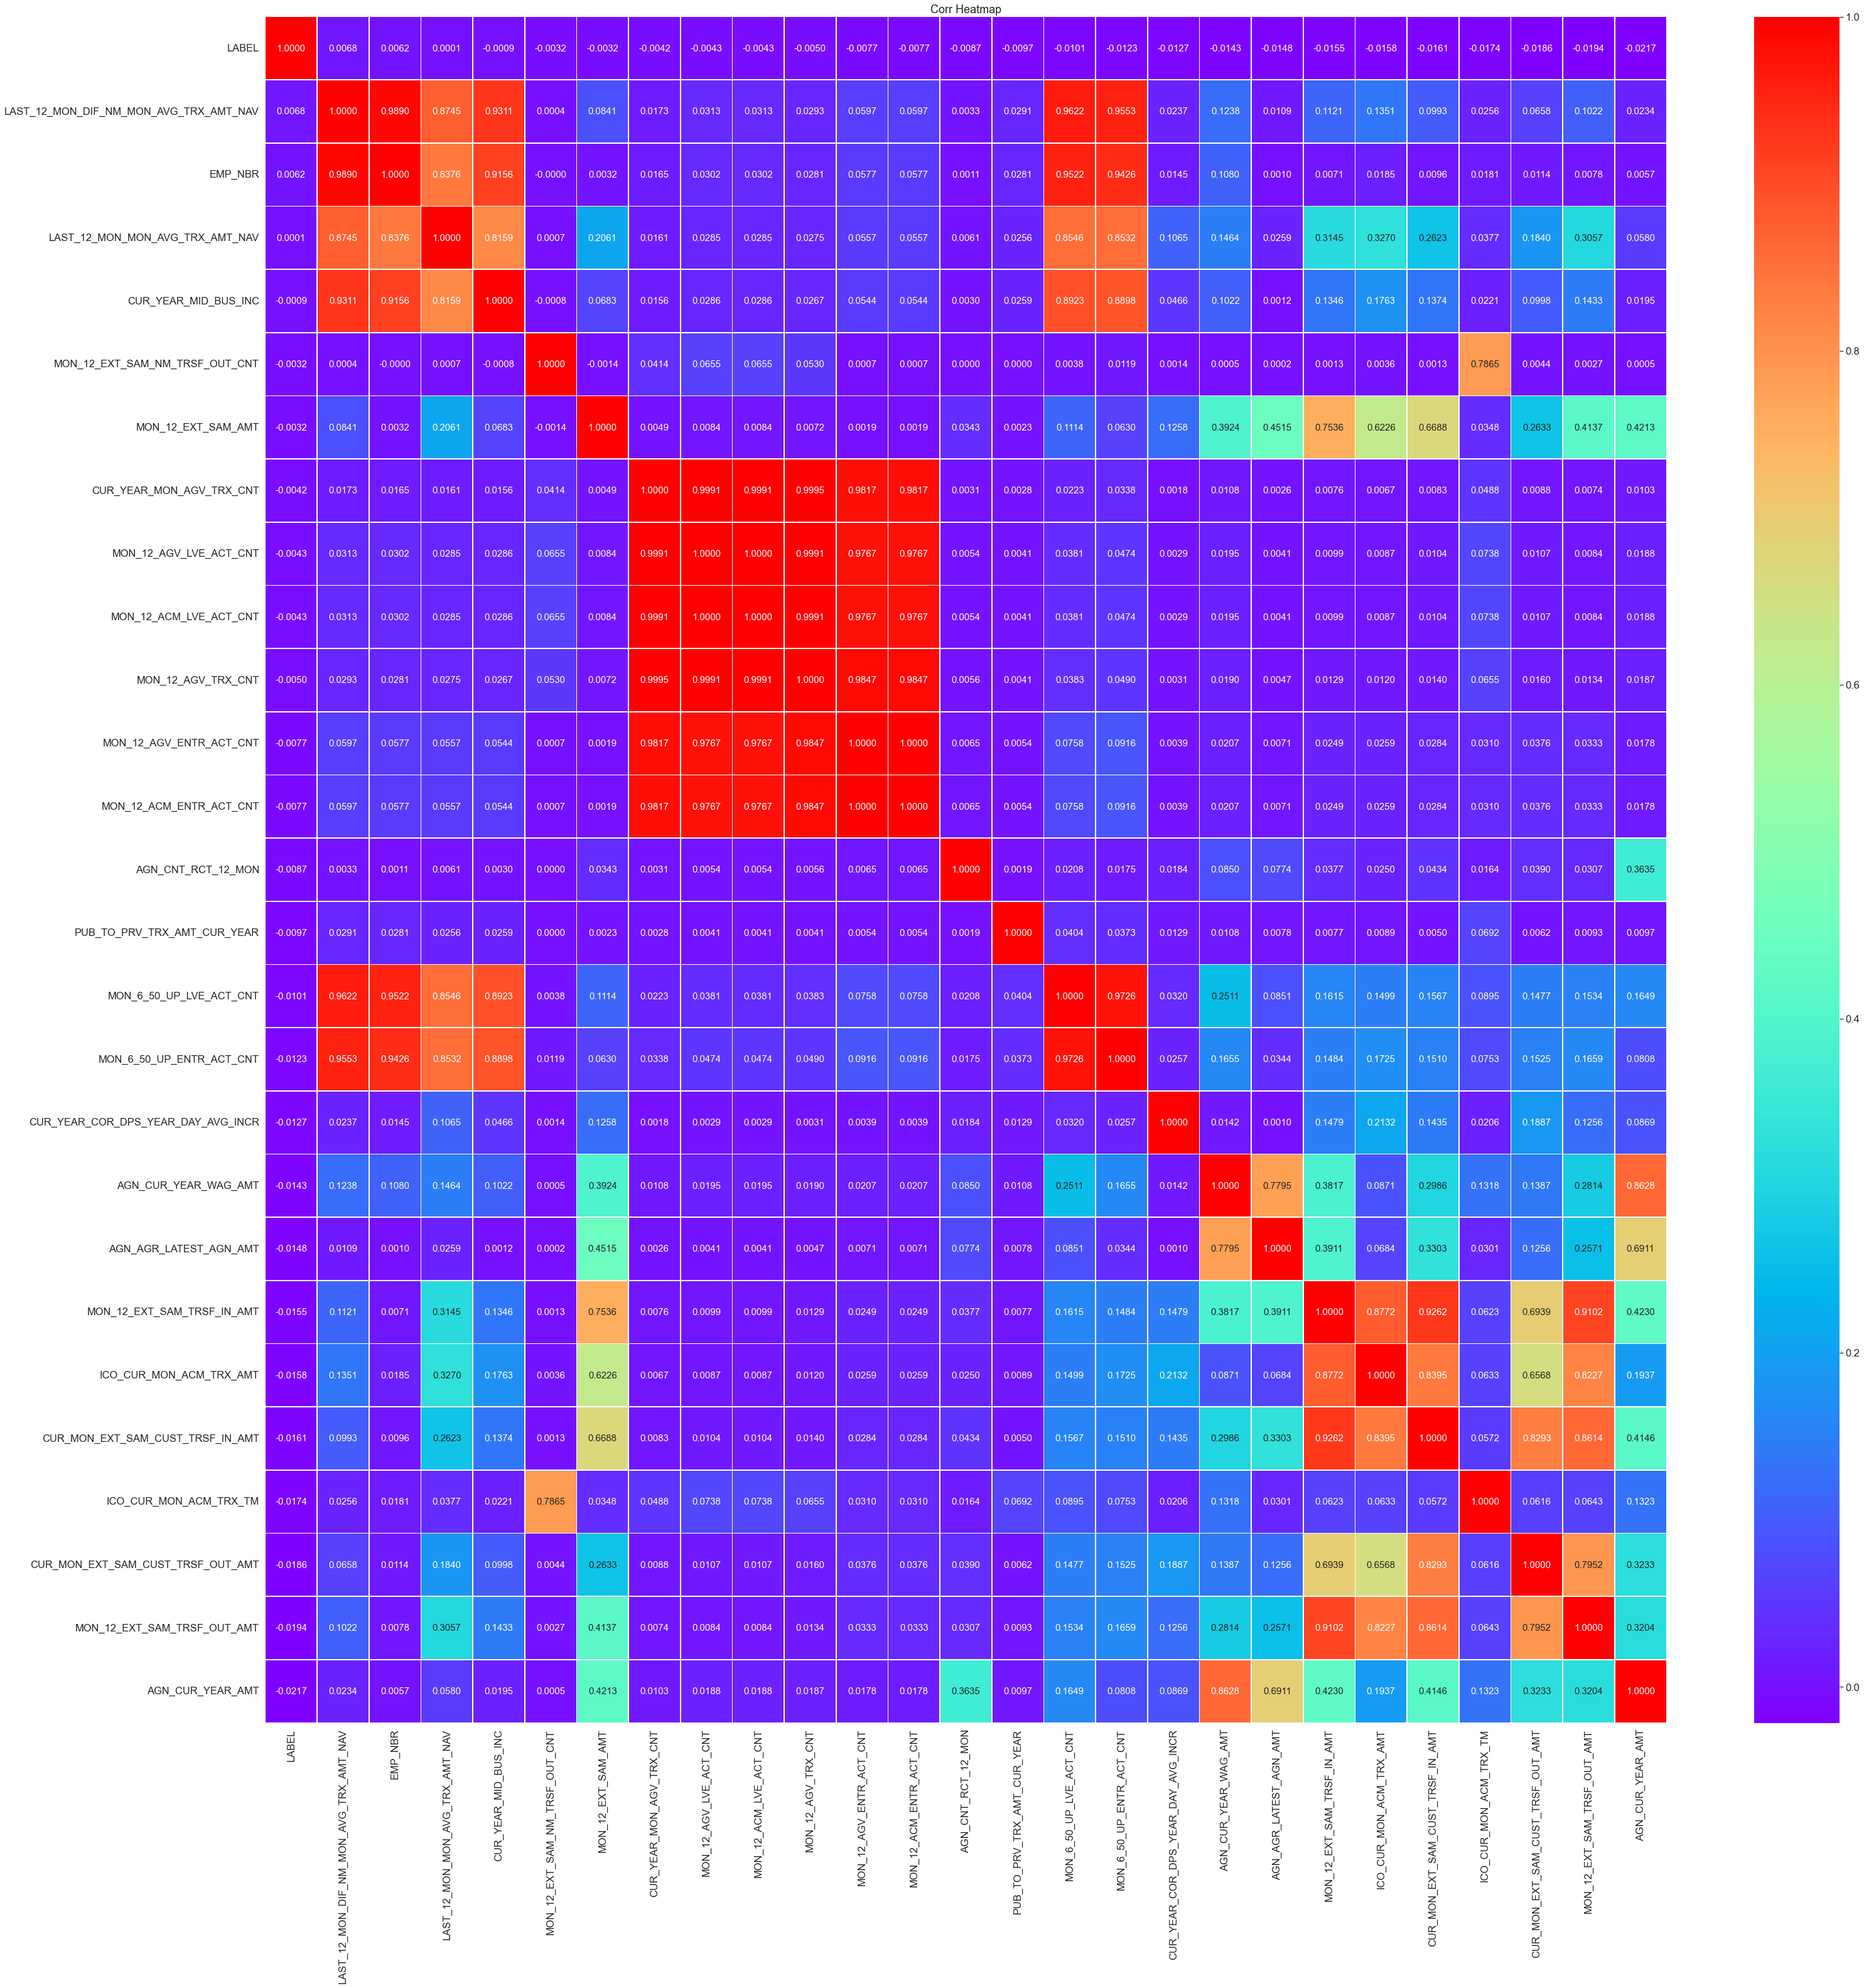

In [32]:
corr = df1[quantitive].corr()
plt.figure(figsize=(50,50))
sns.set(font_scale=1.5)
ax=sns.heatmap(corr,
               xticklabels=corr.columns,
               yticklabels=corr.columns,
               linewidths=0.6,annot=True,
               cbar=True,cmap="rainbow",fmt='.4f',
               annot_kws={'size': 15})
plt.title("Corr Heatmap")
# plt.savefig("Corr Heatmap.png")
plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipp

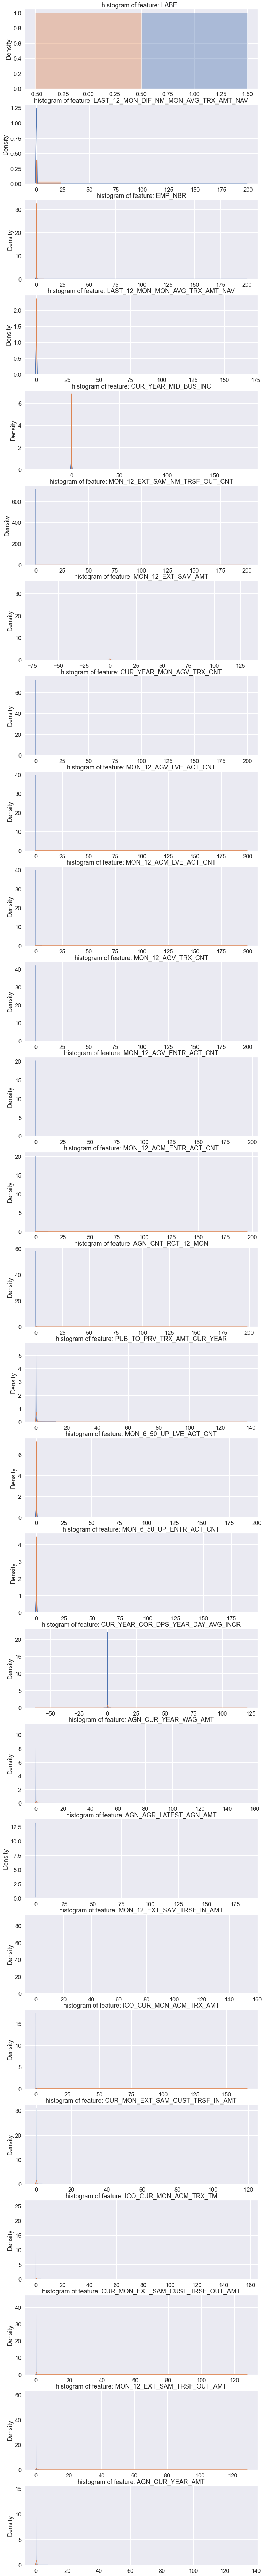

In [35]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,30*5))
gs = gridspec.GridSpec(30, 1)
for i, cn in enumerate(df1[quantitive][:]):
    ax = plt.subplot(gs[i])
    sns.distplot(df1[cn][df1.LABEL == 1], bins=1)
    sns.distplot(df1[cn][df1.LABEL == 0], bins=1)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [108]:
# 等频率离散
# 设置离散区间数
k =6
# 设置频率范围
w = [1.0*i/k for i in range(k+1)]
w

# 使用describe获取频率区域的分界点
w = df1.AGN_CUR_YEAR_AMT.describe(percentiles = w)[4:4+k+1]
# 根据分界点进行数据离散处理
df1.AGN_CUR_YEAR_AMT = pd.cut(df1.AGN_CUR_YEAR_AMT, w, labels = range(k)) 
df1.AGN_CUR_YEAR_AMT

ValueError: Bin edges must be unique: array([-5.11172499e-02, -5.11172499e-02, -5.11172499e-02, -5.11172499e-02,
       -4.77199569e-02, -2.93387346e-02,  1.33984448e+02]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [61]:
# 根据分界点进行数据离散处理
df1.MON_12_AGV_ENTR_ACT_CNT = pd.cut(df1.MON_12_AGV_ENTR_ACT_CNT, w, labels = range(k)) 

In [63]:
df1.MON_12_AGV_ENTR_ACT_CNT

0      5
1    NaN
2    NaN
3    NaN
4    NaN
Name: MON_12_AGV_ENTR_ACT_CNT, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [109]:
quantitive.remove('AGN_CUR_YEAR_AMT')
quantitive

['LABEL',
 'LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV',
 'LAST_12_MON_MON_AVG_TRX_AMT_NAV',
 'CUR_YEAR_MID_BUS_INC',
 'CUR_YEAR_MON_AGV_TRX_CNT',
 'MON_12_AGV_LVE_ACT_CNT',
 'MON_12_ACM_LVE_ACT_CNT',
 'MON_12_ACM_ENTR_ACT_CNT',
 'MON_6_50_UP_LVE_ACT_CNT',
 'MON_6_50_UP_ENTR_ACT_CNT',
 'CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR',
 'ICO_CUR_MON_ACM_TRX_AMT',
 'ICO_CUR_MON_ACM_TRX_TM']

In [112]:
for x in quantitive:
    if x == 'LABEL':
        continue
    # 等频率离散
    # 设置离散区间数
    k =6
    # 设置频率范围
    w = [1.0*i/k for i in range(k+1)]
    w

    # 使用describe获取频率区域的分界点
    w = df2[x].describe(percentiles = w)[4:4+k+1]
    # 根据分界点进行数据离散处理
    df2[x] = pd.cut(df1[x], w, labels = range(k)) 
    print(df2[x])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
11995    NaN
11996    NaN
11997    NaN
11998    NaN
11999    NaN
Name: LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV, Length: 12000, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]
0          0
1          0
2        NaN
3        NaN
4        NaN
        ... 
11995    NaN
11996      0
11997      0
11998      0
11999      0
Name: LAST_12_MON_MON_AVG_TRX_AMT_NAV, Length: 12000, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]
0        0
1        0
2        0
3        0
4        0
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: CUR_YEAR_MID_BUS_INC, Length: 12000, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]
0        NaN
1          0
2        NaN
3        NaN
4        NaN
        ... 
11995    NaN
11996    NaN
11997      0
11998      0
11999      0
Name: CUR_YEAR_MON_AGV_TRX_CNT, Length: 12000, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 

In [114]:
df1.fillna(0, inplace = True)

In [115]:
df2.fillna(0, inplace = True)

In [116]:
df1.to_csv('cleaned train v4.csv')

In [117]:
df2.to_csv('cleaned test v4.csv')

In [118]:
df2.shape

(12000, 48)

In [119]:
label = df1.iloc[:,:1]

In [120]:
feature = df1.iloc[:,1:]

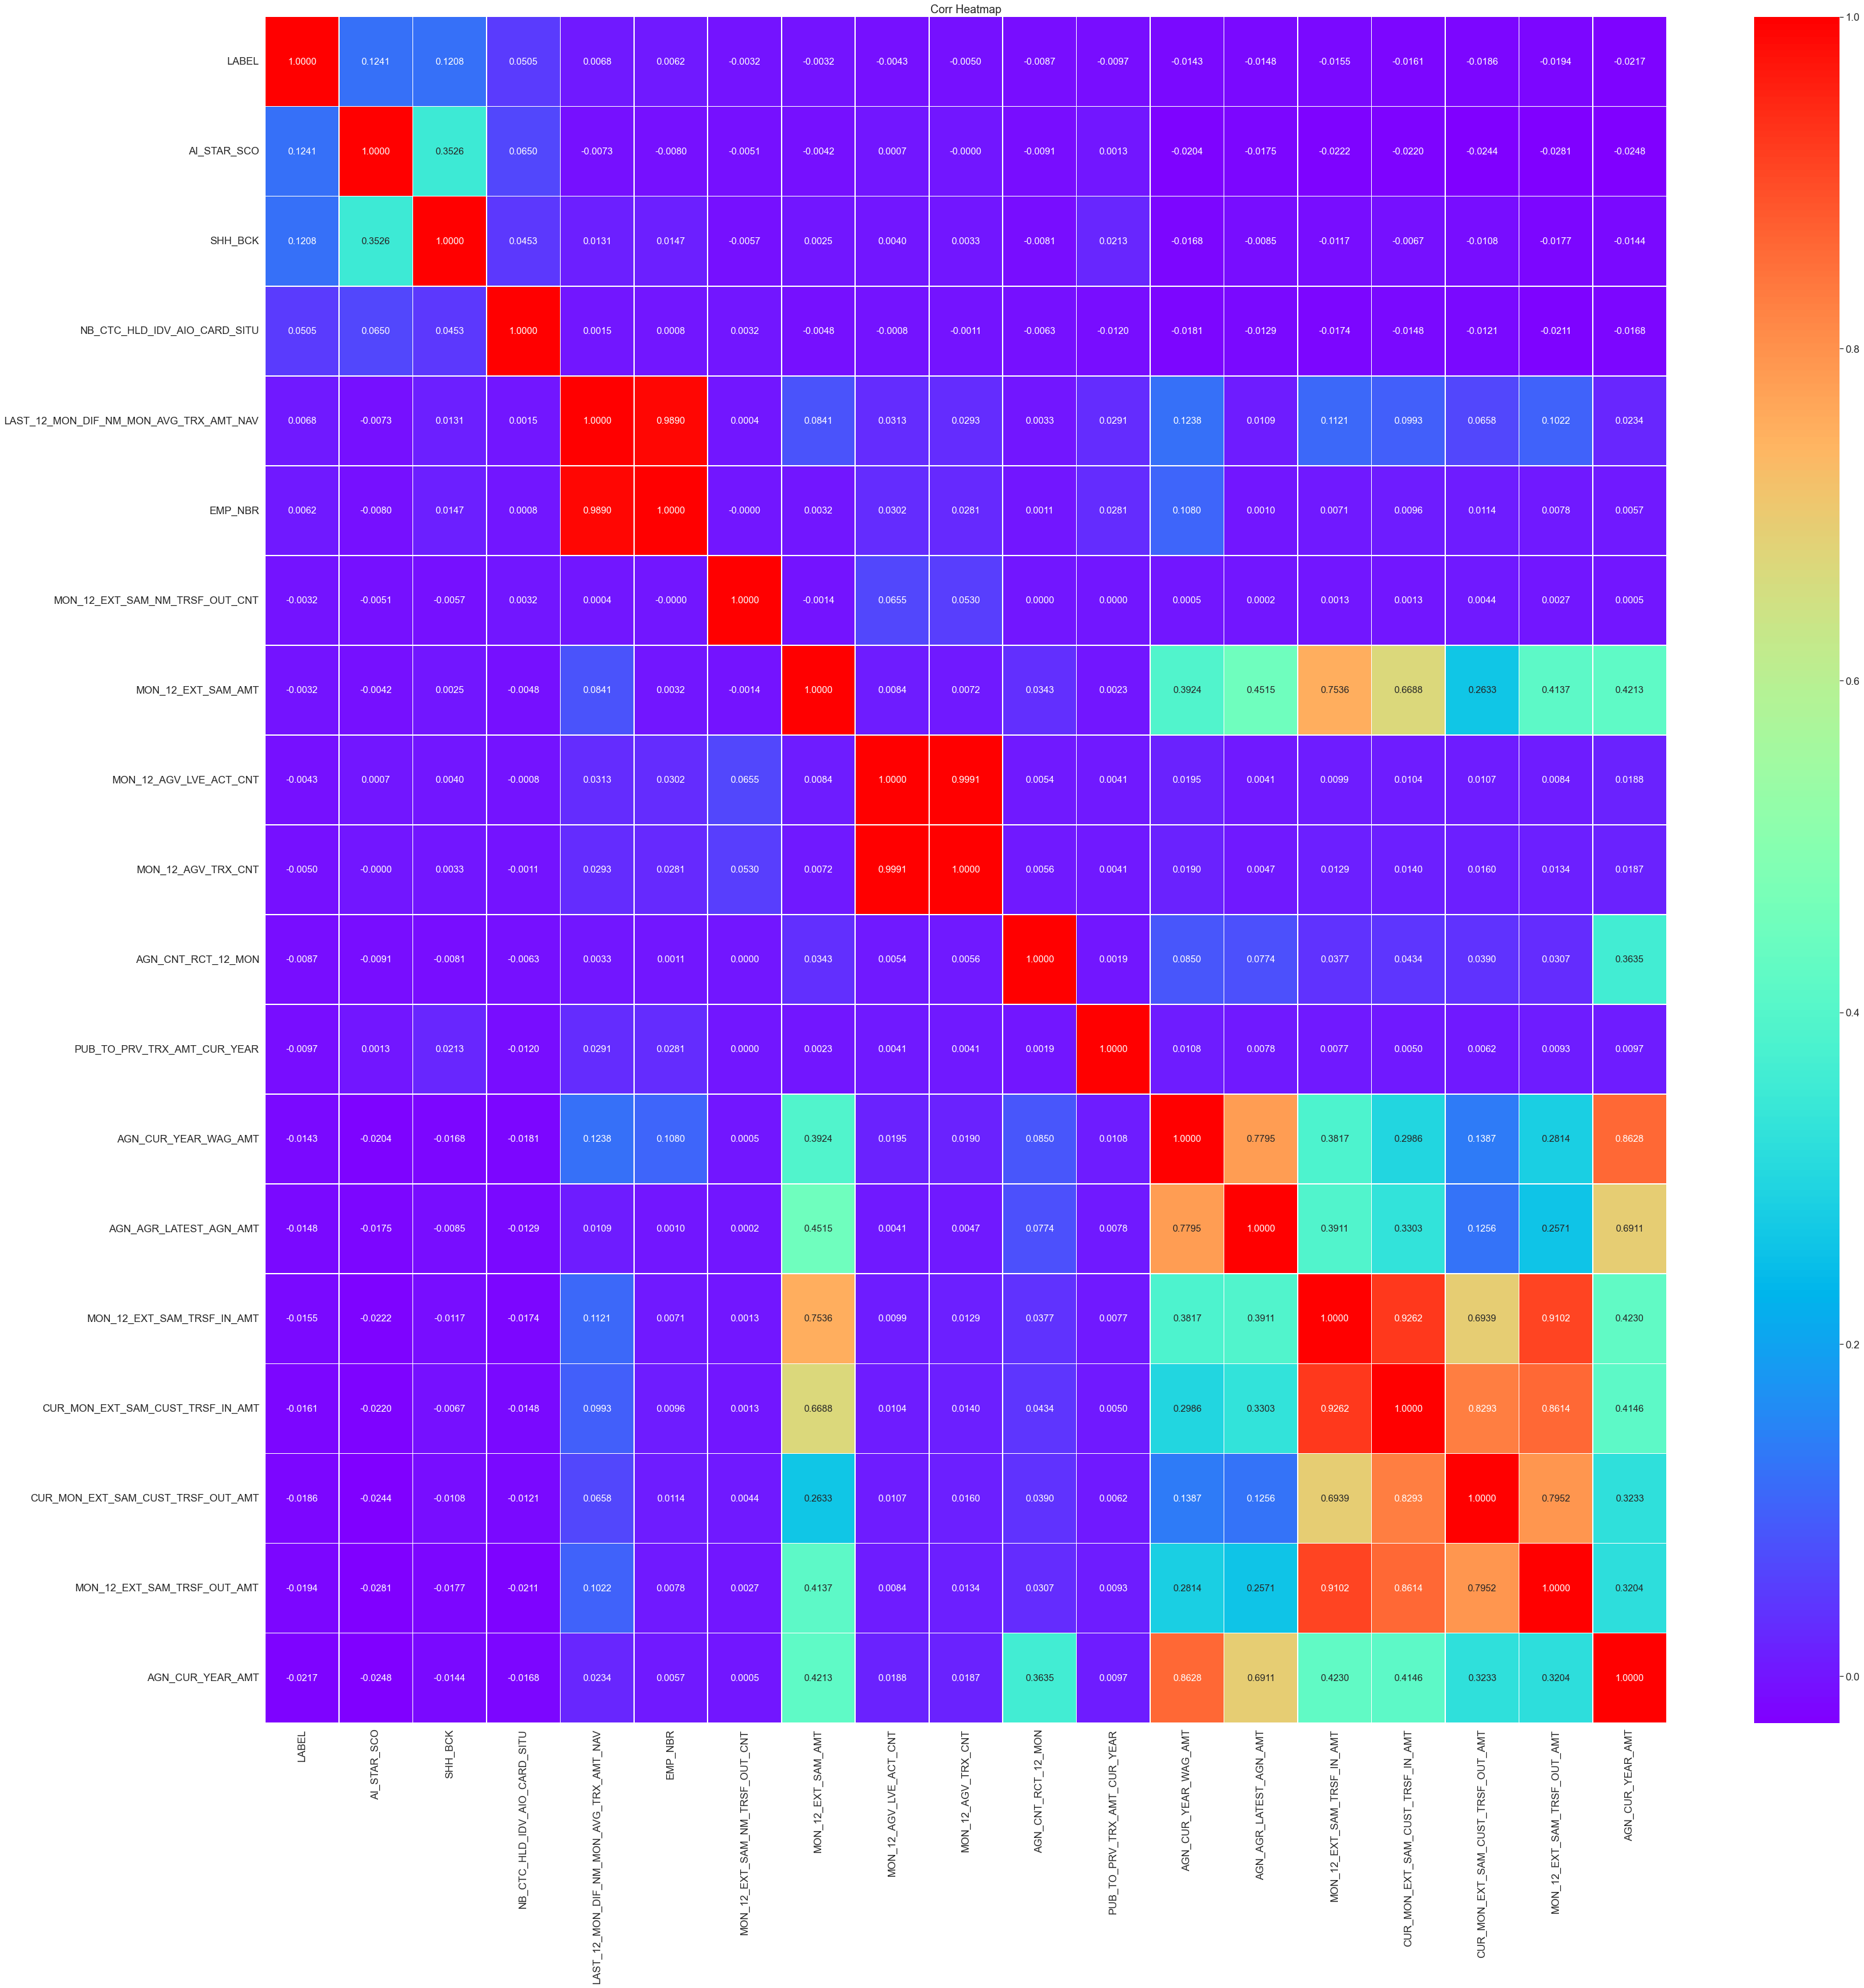

In [121]:
corr = df1.corr()
plt.figure(figsize=(50,50))
sns.set(font_scale=1.5)
ax=sns.heatmap(corr,
               xticklabels=corr.columns,
               yticklabels=corr.columns,
               linewidths=0.6,annot=True,
               cbar=True,cmap="rainbow",fmt='.4f',
               annot_kws={'size': 15})
plt.title("Corr Heatmap")
# plt.savefig("Corr Heatmap.png")
plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipp

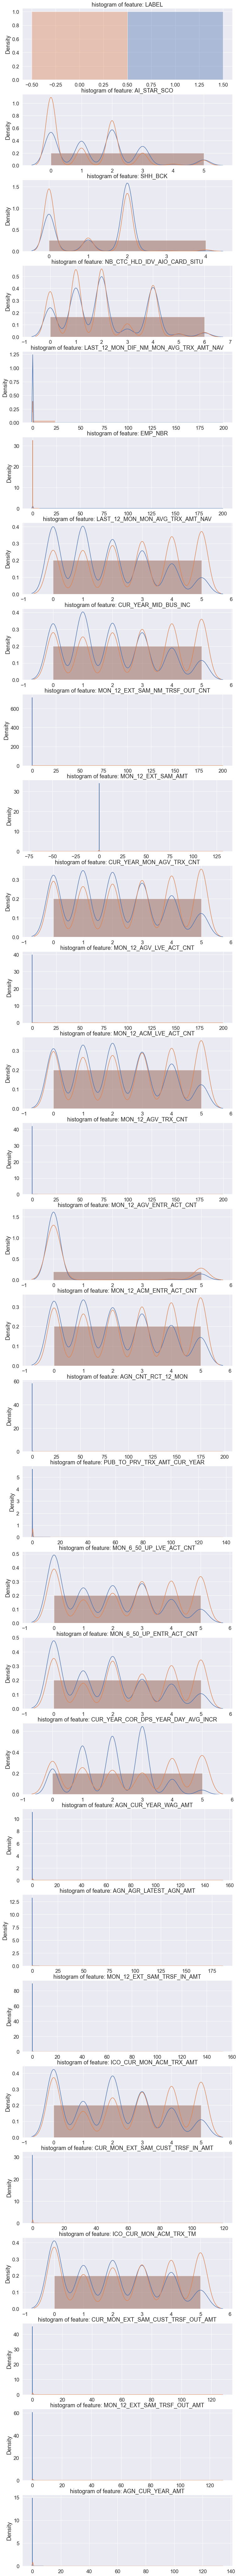

In [122]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,30*5))
gs = gridspec.GridSpec(30, 1)
for i, cn in enumerate(df1[cols][:]):
    ax = plt.subplot(gs[i])
    sns.distplot(df1[cn][df1.LABEL == 1], bins=1)
    sns.distplot(df1[cn][df1.LABEL == 0], bins=1)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [123]:
from scipy import stats
#标准化
from sklearn.preprocessing import StandardScaler
import sklearn #特征工程
from sklearn import preprocessing  #数据预处理
from sklearn.preprocessing import LabelEncoder #编码转换
from sklearn.model_selection import StratifiedShuffleSplit #分层抽样
from sklearn.model_selection import train_test_split #数据集训练集划分
# 训练分类模型
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.svm import SVC#支持向量机
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.neighbors import KNeighborsClassifier #k邻近算法
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import AdaBoostClassifier #分类器算法
from sklearn.ensemble import GradientBoostingClassifier #梯度提升
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier # 岭
from sklearn.neural_network import MLPClassifier #神经网络
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import time

C:\Users\Tracy Tao\AppData\Roaming\Python\Python39\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [125]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=.2,random_state=22)
y_test

LABEL
5977       0
22002      1
16280      0
28876      0
387        0
...      ...
4415       0
23881      0
11297      0
29434      0
9949       0

[7996 rows x 1 columns]

In [127]:
y_test.values.reshape(-1)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
clf = XGBClassifier(learning_rate= 0.05, n_estimators= 300, max_depth= 6, min_child_weight= 5, seed= 0,
                    subsample= 0.9, colsample_bytree= 0.8, gamma= 0, reg_alpha= 5, reg_lambda=0.1, n_jobs = -1)
clf.fit(x_train.values,y_train.values.reshape(-1))
clf.score(x_test.values,y_test.values.reshape(-1))

[10:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.775887943971986

In [145]:
# AUC
from sklearn.metrics import roc_curve, auc
predict_proba = clf.predict_proba(x_test.values)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values.reshape(-1), y_pred[:,1])
auc(false_positive_rate, true_positive_rate)

0.6046600198503995

In [146]:
clf = RandomForestClassifier()
clf.fit(x_train.values,y_train.values.reshape(-1))
clf.score(x_test.values,y_test.values.reshape(-1))

0.7712606303151576

In [147]:
from sklearn.metrics import roc_curve, auc
predict_proba = clf.predict_proba(x_test.values)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values.reshape(-1), y_pred[:,1])
auc(false_positive_rate, true_positive_rate)

0.6046600198503995

In [155]:
predict_proba = clf.predict_proba(df2[list(df1.columns)[1:]].values)
len(predict_proba[:,1])

12000

In [154]:
pd.DataFrame(predict_proba[:,1]).to_csv('Sample Submission v7.csv')

In [158]:
from sklearn.model_selection import GridSearchCV
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

param_test1 = {
 'max_depth':list(range(2,6,9)),
 'min_child_weight':list(range(2,4,6))
}

xgb1 = XGBClassifier(**other_params)
gs1 = GridSearchCV(xgb1,param_test1,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model1=gs1.fit(x_train.values, y_train.values.reshape(-1))
print('最优参数：',best_model1.best_params_)
print('最佳模型得分：',best_model1.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[10:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'max_depth': 2, 'min_child_weight': 2}
最佳模型得分： 0.7935573265862118


In [161]:
# 优化gamma参数
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 2, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

param_test = {
'gaama':[0,0.05,0.1,0.2,0.3]
}

xgb1 = XGBClassifier(**other_params)
gs1 = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs1.fit(x_train.values, y_train.values.reshape(-1))
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[10:12:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "gaama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:12:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'gaama': 0}
最佳模型得分： 0.7935573265862118


In [162]:
# 优化subsample和colsample_bytree
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 2, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
param_test = {
'subsample':[0.6,0.7,0.8,0.9],
'colsample_bytree':[0.6,0.7,0.8,0.9]
}

xgb1 = XGBClassifier(**other_params)
gs1 = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs1.fit(x_train.values, y_train.values.reshape(-1))
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[10:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'colsample_bytree': 0.8, 'subsample': 0.6}
最佳模型得分： 0.7936824615768618


In [163]:
# reg_alpha和reg_lambda
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 2, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.6, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
param_test = {
'reg_alpha': [4,5,6,7], 
'reg_lambda': [0,0.01,0.05, 0.1, ]
}

xgb1 = XGBClassifier(**other_params)
gs1 = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs1.fit(x_train.values, y_train.values.reshape(-1))
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[10:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'reg_alpha': 6, 'reg_lambda': 0.1}
最佳模型得分： 0.7930919185301359


In [165]:
# 继续 reg_lambda

other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 2, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.6, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 6, 'reg_lambda': 0.1}
param_test = {
'reg_lambda': [0.05, 0.1,0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
}

xgb1 = XGBClassifier(**other_params)
gs1 = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs1.fit(x_train.values, y_train.values.reshape(-1))
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[10:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'reg_lambda': 0.35}
最佳模型得分： 0.7938864825758912


In [166]:
# learning_rate和n_estimators
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 2, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.6, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 6, 'reg_lambda': 0.35}
param_test = {
'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.15, 0.2], 
'n_estimators': [100,200,300,400,500]
}

xgb1 = XGBClassifier(**other_params)
gs1 = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs1.fit(x_train.values, y_train.values.reshape(-1))
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[10:23:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'learning_rate': 0.1, 'n_estimators': 500}
最佳模型得分： 0.8021358864440172


In [168]:
clf = XGBClassifier(learning_rate= 0.1, n_estimators= 500, max_depth= 2, min_child_weight= 2, seed= 0,
                    subsample= 0.6, colsample_bytree= 0.8, gamma= 0, reg_alpha= 6, reg_lambda=0.35, n_jobs = -1)
clf.fit(x_train.values,y_train.values.reshape(-1))
clf.score(x_test.values,y_test.values.reshape(-1))

[10:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7727613806903452

In [170]:
# AUC
from sklearn.metrics import roc_curve, auc
predict_proba = clf.predict_proba(x_test.values)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values.reshape(-1), y_pred[:,1])
auc(false_positive_rate, true_positive_rate)

0.6046600198503995

In [172]:
predict_proba = clf.predict_proba(df2[list(df1.columns)[1:]].values)
len(predict_proba[:,1])

12000

In [173]:
pd.DataFrame(predict_proba[:,1]).to_csv('Sample Submission v8.csv')

In [174]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from pytorch_tabnet.pretraining import TabNetPretrainer
import torch

In [175]:
# TabNetPretrainer 预训练模型
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax' # "sparsemax"
)

unsupervised_model.fit(
    X_train=x_train.values,
    eval_set=[x_train.values],
    pretraining_ratio=0.8,
)

clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

clf.fit(x_train.values, y_train.values.reshape(-1),
    eval_set= [(x_train.values, y_train.values.reshape(-1))],
    eval_name=['train'],
    eval_metric=['auc'],
    from_unsupervised=unsupervised_model
)

Device used : cpu
epoch 0  | loss: 510.63509| val_0_unsup_loss: 1.70441 |  0:00:02s
epoch 1  | loss: 4.94021 | val_0_unsup_loss: 1.76569 |  0:00:05s
epoch 2  | loss: 1.94238 | val_0_unsup_loss: 1.44917 |  0:00:08s
epoch 3  | loss: 1.49609 | val_0_unsup_loss: 1.07156 |  0:00:11s
epoch 4  | loss: 1.11786 | val_0_unsup_loss: 1.01558 |  0:00:15s
epoch 5  | loss: 1.09662 | val_0_unsup_loss: 1.00005 |  0:00:18s
epoch 6  | loss: 1.03567 | val_0_unsup_loss: 1.02155 |  0:00:22s
epoch 7  | loss: 1.02104 | val_0_unsup_loss: 0.92986 |  0:00:25s
epoch 8  | loss: 0.98311 | val_0_unsup_loss: 0.90156 |  0:00:28s
epoch 9  | loss: 0.96522 | val_0_unsup_loss: 0.88745 |  0:00:32s
epoch 10 | loss: 0.95335 | val_0_unsup_loss: 0.8953  |  0:00:35s
epoch 11 | loss: 0.95757 | val_0_unsup_loss: 0.8831  |  0:00:39s
epoch 12 | loss: 0.94312 | val_0_unsup_loss: 0.89761 |  0:00:42s
epoch 13 | loss: 0.94795 | val_0_unsup_loss: 0.87798 |  0:00:45s
epoch 14 | loss: 0.9468  | val_0_unsup_loss: 0.87391 |  0:00:48s
epoch 

In [176]:
predict_proba = clf.predict_proba(x_test.values)
predict_proba[:,1]

array([0.04039679, 0.2709284 , 0.2145527 , ..., 0.40701786, 0.02323665,
       0.13079554], dtype=float32)

In [177]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values.reshape(-1), predict_proba[:,1])
auc(false_positive_rate, true_positive_rate)

0.7872822945848122

In [178]:
predict_proba = clf.predict_proba(df2[list(df1.columns)[1:]].values)
len(predict_proba[:,1])

12000

In [179]:
pd.DataFrame(predict_proba[:,1]).to_csv('Sample Submission v9.csv')

In [185]:
# TabNetPretrainer 预训练模型
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-1),
    mask_type='sparsemax' # "sparsemax"
)

unsupervised_model.fit(
    X_train=x_train.values,
    eval_set=[x_train.values],
    pretraining_ratio=0.8,
)

clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-1),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

clf.fit(x_train.values, y_train.values.reshape(-1),
    eval_set= [(x_train.values, y_train.values.reshape(-1))],
    eval_name=['train'],
    eval_metric=['auc'],
    from_unsupervised=unsupervised_model
)

Device used : cpu
epoch 0  | loss: 270.10156| val_0_unsup_loss: 1.82951 |  0:00:02s
epoch 1  | loss: 1.89222 | val_0_unsup_loss: 1.11452 |  0:00:04s
epoch 2  | loss: 1.3813  | val_0_unsup_loss: 1.01894 |  0:00:08s
epoch 3  | loss: 1.18908 | val_0_unsup_loss: 1.04749 |  0:00:11s
epoch 4  | loss: 1.13712 | val_0_unsup_loss: 0.99952 |  0:00:15s
epoch 5  | loss: 1.03216 | val_0_unsup_loss: 0.96068 |  0:00:18s
epoch 6  | loss: 1.02648 | val_0_unsup_loss: 0.95024 |  0:00:21s
epoch 7  | loss: 1.03994 | val_0_unsup_loss: 0.95956 |  0:00:24s
epoch 8  | loss: 1.04887 | val_0_unsup_loss: 0.93552 |  0:00:28s
epoch 9  | loss: 0.98125 | val_0_unsup_loss: 0.93416 |  0:00:32s
epoch 10 | loss: 1.03305 | val_0_unsup_loss: 0.94185 |  0:00:35s
epoch 11 | loss: 1.01699 | val_0_unsup_loss: 0.93649 |  0:00:39s
epoch 12 | loss: 1.00164 | val_0_unsup_loss: 0.93083 |  0:00:42s
epoch 13 | loss: 0.97989 | val_0_unsup_loss: 0.8957  |  0:00:46s
epoch 14 | loss: 0.97655 | val_0_unsup_loss: 0.90803 |  0:00:49s
epoch 

In [186]:
predict_proba = clf.predict_proba(x_test.values)
predict_proba[:,1]

array([0.07925416, 0.36964926, 0.2860551 , ..., 0.48823997, 0.05349611,
       0.2763601 ], dtype=float32)

In [187]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values.reshape(-1), predict_proba[:,1])
auc(false_positive_rate, true_positive_rate)

0.7870552337864489

In [188]:
predict_proba = clf.predict_proba(df2[list(df1.columns)[1:]].values)
len(predict_proba[:,1])

12000

In [189]:
pd.DataFrame(predict_proba[:,1]).to_csv('Sample Submission v10.csv')

In [191]:
# 载入包
from autogluon.tabular import TabularDataset, TabularPredictor
# 载入训练数据
train_data = df1.iloc[:30000,:]
# 建模
predictor = TabularPredictor(label='LABEL').fit(train_data, time_limit=120)  # Fit models for 120s
# 载入测试数据
test_data = df1.iloc[30000:,:]
# 查看模型性能排名
leaderboard = predictor.leaderboard(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220507_025745\"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220507_025745\"
AutoGluon Version:  0.4.0
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    30000
Train Data Columns: 29
Label Column: LABEL
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6759.92 MB
	Train Data (Original)  Memory Usage: 4.65 MB (0.1% of available memory)
	Inferring data

                  model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost    0.781676     0.7924        0.021999       0.017007  38.876401                 0.021999                0.017007          38.876401            1       True          7
1   WeightedEnsemble_L2    0.781476     0.7980        0.824995       0.318015  50.661431                 0.037007                0.005999           1.175041            2       True         14
2              LightGBM    0.780273     0.7904        0.060990       0.019000   0.938999                 0.060990                0.019000           0.938999            1       True          4
3            LightGBMXT    0.777366     0.7848        0.030000       0.015000   0.591511                 0.030000                0.015000           0.591511            1       True          3
4      RandomForestEntr    0.775361     

#### 使用TOP3： CatBoost，LightGBM，LightGBMXT

In [194]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
other_params = {                
                'random_state': 1,
                'verbose': 0, 
                'n_estimators': 100,
                'loss_function': 'CrossEntropy',
                'learning_rate': 1e-5,
                'subsample': 0.6,
                'one_hot_max_size': 2,
                'fold_len_multiplier': 2,
                'learning_rate':0.03,
                'l2_leaf_reg':3,
                'bagging_temperature':1,
                'random_strength':1,
               }


param_test = {
            'n_estimators': [100, 200, 300, 400, 500, 600], 
            'learning_rate': [1e-1, 0.01, 1e-3, 1e-4, 3e-1, 3e-2, 3e-3]
            }

clf1 = CatBoostClassifier(**other_params)
gs1 = GridSearchCV(clf1,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs1.fit(x_train.values, y_train.values.reshape(-1))
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
最优参数： {'learning_rate': 0.03, 'n_estimators': 600}
最佳模型得分： 0.8061573324714711


In [195]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
other_params = {                
                'random_state': 1,
                'verbose': 0, 
                'n_estimators': 600,
                'loss_function': 'CrossEntropy',
                'learning_rate': 0.03,
                'subsample': 0.6,
                'one_hot_max_size': 2,
                'fold_len_multiplier': 2,
                'learning_rate':0.03,
                'l2_leaf_reg':3,
                'bagging_temperature':1,
                'random_strength':1,
               }


param_test = {
            'subsample': [0.5, 0.6, 0.66 , 0.7, 0.8, 0.9],
    'one_hot_max_size': [2,3,4,5,6],
    'n_estimators': [600, 700, 800, 900],
                
            }

clf1 = CatBoostClassifier(**other_params)
gs1 = GridSearchCV(clf1,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs1.fit(x_train.values, y_train.values.reshape(-1))
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 

In [197]:
y_test = test_data['LABEL']  # 提取标签列
test_data_nolab = test_data.drop(columns=['LABEL'])  # 删除标签列
test_data_nolab.head()

AI_STAR_SCO  SHH_BCK  NB_CTC_HLD_IDV_AIO_CARD_SITU  \
30017            2        0                             1   
30018            2        2                             2   
30019            5        2                             1   
30020            0        2                             1   
30021            2        0                             4   

       LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV   EMP_NBR  \
30017                               -0.001449 -0.009761   
30018                               -0.007382 -0.010393   
30019                               -0.008751 -0.008286   
30020                               -0.008951 -0.010162   
30021                               -0.006815 -0.009761   

      LAST_12_MON_MON_AVG_TRX_AMT_NAV CUR_YEAR_MID_BUS_INC  \
30017                               5                    4   
30018                               4                    5   
30019                               2                    0   
30020                               1                    1   
30021                               5                    3   

       MON_12_EXT_SAM_NM_TRSF_OUT_CNT  MON_12_EXT_SAM_AMT  \
30017                       -0.004400            0.030662   
30018                       -0.005556           -0.004834   
30019                       -0.006134           -0.004801   
30020                       -0.006134           -0.004801   
30021                       -0.004400            0.093840   

      CUR_YEAR_MON_AGV_TRX_CNT  ...  CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR  \
30017                        4  ...                                   4   
30018                        4  ...                                   3   
30019                        3  ...                                   5   
30020                        5  ...                                   1   
30021                        4  ...                                   3   

      AGN_CUR_YEAR_WAG_AMT  AGN_AGR_LATEST_AGN_AMT MON_12_EXT_SAM_TRSF_IN_AMT  \
30017            -0.023085                0.180193                   0.004310   
30018            -0.032617               -0.039986                  -0.029484   
30019            -0.032617               -0.032776                  -0.029484   
30020            -0.021815               -0.017847                  -0.029484   
30021            -0.032617               -0.039986                   0.044522   

      ICO_CUR_MON_ACM_TRX_AMT  CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT  \
30017                       5                         -0.021804   
30018                       3                         -0.030589   
30019                       5                         -0.030589   
30020                       3                         -0.030589   
30021                       4                         -0.023706   

       ICO_CUR_MON_ACM_TRX_TM CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT  \
30017                       5                          0.041010   
30018                       4                         -0.035304   
30019                       4                         -0.035304   
30020                       4                         -0.035304   
30021                       3                         -0.016225   

      MON_12_EXT_SAM_TRSF_OUT_AMT AGN_CUR_YEAR_AMT  
30017                   -0.013349        -0.027316  
30018                   -0.037790        -0.051117  
30019                   -0.037811        -0.040070  
30020                   -0.037811        -0.041792  
30021                    0.002538        -0.051117  

[5 rows x 29 columns]

In [198]:
y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.7814755412991179
Evaluations on test data:
{
    "accuracy": 0.7814755412991179,
    "balanced_accuracy": 0.6248339296097689,
    "mcc": 0.3281541913961263,
    "f1": 0.41617568291376544,
    "precision": 0.6281325788197252,
    "recall": 0.31117340808970767
}


Predictions:  
 30017    0
30018    0
30019    0
30020    0
30021    0
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: LABEL, Length: 9976, dtype: int64


In [200]:
predictor.leaderboard(test_data, silent=True)

model  score_test  score_val  pred_time_test  pred_time_val  \
0              CatBoost    0.781676     0.7924        0.018999       0.017007   
1   WeightedEnsemble_L2    0.781476     0.7980        0.628997       0.318015   
2              LightGBM    0.780273     0.7904        0.041998       0.019000   
3            LightGBMXT    0.777366     0.7848        0.020999       0.015000   
4      RandomForestEntr    0.775361     0.7916        0.230000       0.143005   
5         LightGBMLarge    0.773957     0.7776        0.022000       0.025000   
6      RandomForestGini    0.772955     0.7888        0.303000       0.133004   
7        ExtraTreesGini    0.772654     0.7812        0.360011       0.155789   
8               XGBoost    0.772053     0.7908        0.064999       0.030998   
9        NeuralNetTorch    0.770750     0.7684        0.212999       0.101001   
10       ExtraTreesEntr    0.769647     0.7804        0.389778       0.146005   
11      NeuralNetFastAI    0.767642     0.7764        0.156001       0.066000   
12       KNeighborsUnif    0.700080     0.7216        0.078995       0.027001   
13       KNeighborsDist    0.695369     0.7184        0.120994       0.024998   

     fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0   38.876401                 0.018999                0.017007   
1   50.661431                 0.035000                0.005999   
2    0.938999                 0.041998                0.019000   
3    0.591511                 0.020999                0.015000   
4    6.664993                 0.230000                0.143005   
5    0.770999                 0.022000                0.025000   
6    3.005998                 0.303000                0.133004   
7    2.418807                 0.360011                0.155789   
8    3.029996                 0.064999                0.030998   
9   13.791998                 0.212999                0.101001   
10   3.325992                 0.389778                0.146005   
11  44.212989                 0.156001                0.066000   
12   0.031999                 0.078995                0.027001   
13   0.027000                 0.120994                0.024998   

    fit_time_marginal  stack_level  can_infer  fit_order  
0           38.876401            1       True          7  
1            1.175041            2       True         14  
2            0.938999            1       True          4  
3            0.591511            1       True          3  
4            6.664993            1       True          6  
5            0.770999            1       True         13  
6            3.005998            1       True          5  
7            2.418807            1       True          8  
8            3.029996            1       True         11  
9           13.791998            1       True         12  
10           3.325992            1       True          9  
11          44.212989            1       True         10  
12           0.031999            1       True          1  
13           0.027000            1       True          2

In [212]:
time_limit = 180  # 这里设置 60 秒仅用于快速演示代码，在实际中应该设置为你愿意等待的最长时间（以秒为单位）
metric = 'roc_auc'  # 指定模型性能指标，这里为 AUC
predictor = TabularPredictor('LABEL', eval_metric=metric).fit(train_data, time_limit=time_limit, presets='best_quality')
predictor.leaderboard(test_data, silent=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20220507_043854\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "AutogluonModels/ag-20220507_043854\"
AutoGluon Version:  0.4.0
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    30000
Train Data Columns: 29
Label Column: LABEL
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4398.99 MB
	Train Data (Original)  Memory Usage: 4.65 MB (0.1% 

model  score_test  score_val  pred_time_test  \
0           LightGBM_BAG_L2    0.805975   0.804230        3.221993   
1         LightGBMXT_BAG_L2    0.805803   0.805105        3.311990   
2           LightGBM_BAG_L1    0.805785   0.803767        0.633999   
3       WeightedEnsemble_L3    0.805671   0.805868        4.222469   
4       WeightedEnsemble_L2    0.805361   0.807293        2.851991   
5         LightGBMXT_BAG_L1    0.803878   0.802949        0.691000   
6   RandomForestEntr_BAG_L2    0.801626   0.799298        3.309991   
7           CatBoost_BAG_L1    0.799561   0.799051        0.098932   
8   RandomForestGini_BAG_L2    0.799290   0.799315        3.301471   
9   RandomForestEntr_BAG_L1    0.795524   0.796738        0.417004   
10  RandomForestGini_BAG_L1    0.793421   0.795758        0.348991   
11    ExtraTreesGini_BAG_L1    0.786935   0.786386        0.519067   
12    KNeighborsUnif_BAG_L1    0.576336   0.593544        0.132000   
13    KNeighborsDist_BAG_L1    0.568344   0.589631        0.134999   

    pred_time_val    fit_time  pred_time_test_marginal  \
0        8.109830   93.788166                 0.246001   
1        8.299827   93.284166                 0.335998   
2        1.045996    9.257989                 0.633999   
3       11.560903  121.543449                 0.004999   
4        7.477755   92.909343                 0.007999   
5        1.531925   11.700058                 0.691000   
6        9.161833   98.178614                 0.334000   
7        0.421001   52.940941                 0.098932   
8        9.158896   94.357166                 0.325480   
9        1.296008    6.086038                 0.417004   
10       1.307080    4.453995                 0.348991   
11       1.616746    2.589999                 0.519067   
12       0.255073    0.029079                 0.132000   
13       0.252000    0.025075                 0.134999   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.384002           6.704993            2       True   
1                 0.574000           6.200993            2       True   
2                 1.045996           9.257989            1       True   
3                 0.007999           3.184857            3       True   
4                 0.007000           5.855248            2       True   
5                 1.531925          11.700058            1       True   
6                 1.436005          11.095440            2       True   
7                 0.421001          52.940941            1       True   
8                 1.433069           7.273992            2       True   
9                 1.296008           6.086038            1       True   
10                1.307080           4.453995            1       True   
11                1.616746           2.589999            1       True   
12                0.255073           0.029079            1       True   
13                0.252000           0.025075            1       True   

    fit_order  
0          11  
1          10  
2           4  
3          14  
4           9  
5           3  
6          13  
7           7  
8          12  
9           6  
10          5  
11          8  
12          1  
13          2

In [214]:
y_pred = predictor.predict_proba(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: roc_auc on test data: 0.8053610046723805
Evaluations on test data:
{
    "roc_auc": 0.8053610046723805,
    "accuracy": 0.7812750601443464,
    "balanced_accuracy": 0.6234997440169279,
    "mcc": 0.326468424729883,
    "f1": 0.4131253362022593,
    "precision": 0.628992628992629,
    "recall": 0.3075690828994794
}


Predictions:  
               0         1
30017  0.986610  0.013390
30018  0.771205  0.228795
30019  0.844688  0.155312
30020  0.754761  0.245239
30021  0.806301  0.193699
...         ...       ...
39995  0.781378  0.218622
39996  0.806683  0.193317
39997  0.990951  0.009049
39998  0.567508  0.432492
39999  0.971942  0.028058

[9976 rows x 2 columns]


In [215]:
predict_proba = predictor.predict_proba(df2[list(df1.columns)[1:]])
predict_proba.iloc[:,1:].values.reshape(-1)

array([0.17225569, 0.21650071, 0.17895898, ..., 0.2238536 , 0.23652177,
       0.22958314])

In [216]:
pd.DataFrame(predict_proba.iloc[:,1:].values.reshape(-1)).to_csv('Sample Submission v12.csv')